<a href="https://colab.research.google.com/github/ahmadfahriramadhani/Pengolahan-Citra-Digital-F-/blob/main/TugasPCD2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
# get image from link google image
import urllib.request
# from PIL import Image  # https://www.geeksforgeeks.org/python-pillow-a-fork-of-pil/
# https://media.geeksforgeeks.org/wp-content/uploads/20210318103632/gfg-300x300.png

urllib.request.urlretrieve(
'https://i.pinimg.com/originals/ed/a7/df/eda7dfe49dac8e0fa01d2b20129208de.jpg', # link from google image
"kuda.png")

# img = Image.open("gfg.png") #load image filename

('kuda.png', <http.client.HTTPMessage at 0x7d7e1a09e710>)

Resolusi gambar: 1024x992 piksel


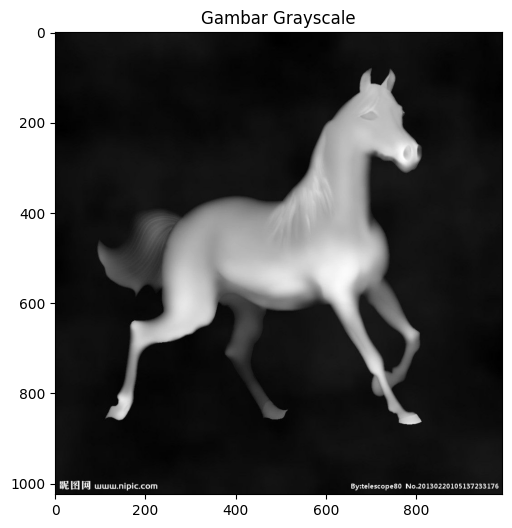

In [11]:
# load image

import cv2 # https://docs.opencv.org/4.x/d6/d00/tutorial_py_root.html
import matplotlib.pyplot as plt
import numpy as np

# Membaca gambar
image = cv2.imread('kuda.png', cv2.IMREAD_GRAYSCALE)


# Dapatkan resolusi gambar dalam piksel
width, height = image.shape
print(f"Resolusi gambar: {width}x{height} piksel")

# Menampilkan gambar
plt.figure(figsize=(6,6))
plt.imshow(image, cmap='gray')
plt.title("Gambar Grayscale")
plt.show()

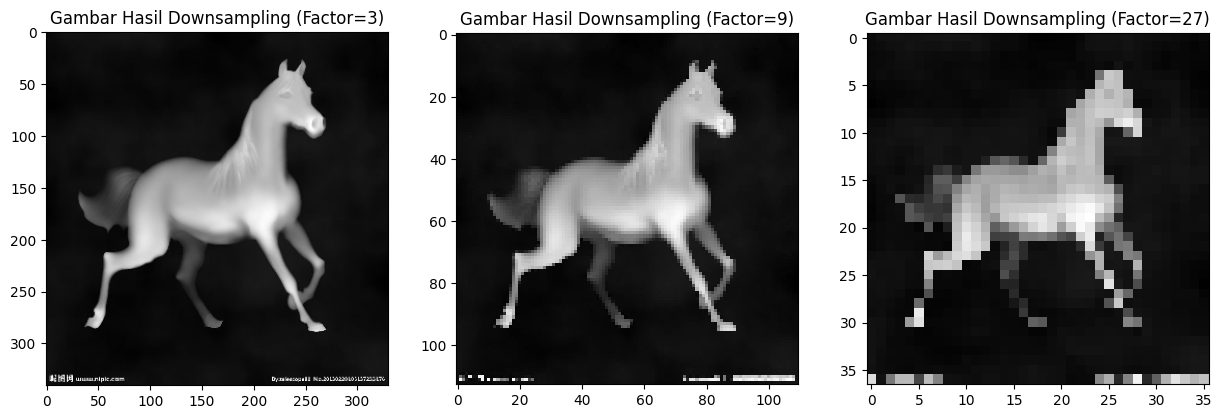

In [12]:
# Downsampling process
factors = 3**np.arange(1,4)
# factors = [1,2,3]
# print(factors)

#create a subplot for each sample
figure,axis = plt.subplots(1,len(factors),figsize=(15,5))

# loop over each sampling factor
for factor, ax in zip(factors,axis): # https://pub.aimind.so/unleashing-the-power-of-enumerate-zip-and-map-when-use-in-python-a76bfd6297fc
    new_size = (image.shape[1] // factor, image.shape[0] // factor) # process downsampling -- baris dan colom
    downsampled_image = cv2.resize(image, new_size)
    ax.imshow(downsampled_image, cmap='gray')
    ax.set_title(f'Gambar Hasil Downsampling (Factor={factor})')
plt.show()

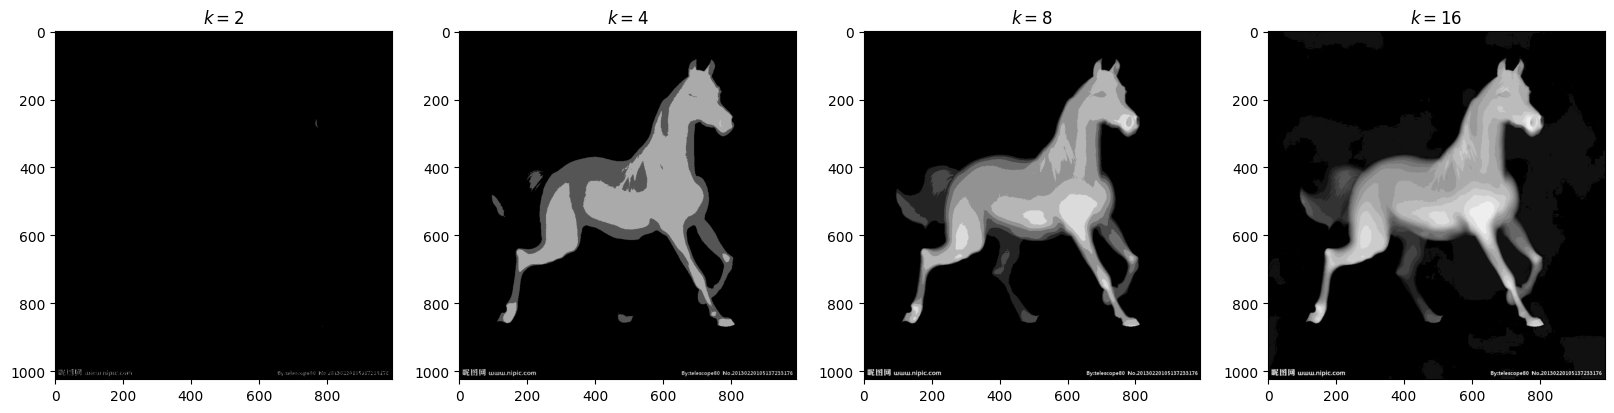

In [13]:
# Membuat faktor kuantisasi
factors = 2**np.arange(1, 5)
# Menyiapkan subplot
figure, axis = plt.subplots(1, len(factors), figsize=(20, 6))
# Iterasi melalui faktor-faktor kuantisasi
for idx, (k, ax) in enumerate(zip(factors, axis)):
    # Membuat bins dengan k level
    bins = np.linspace(0, image.max(), k) # Synatx: numpy.linspace(start, stop, num=50, endpoint=True , retstep=False, dtype=None, axis=0)
    # print(bins)

    # Kuantisasi gambar ke dalam bins
    quantized_image = np.digitize(image, bins) - 1  # Dikurangi 1 agar hasil sesuai dengan indeks list
    # Membangun ulang gambar kuantisasi
    reconstructed_image = np.take(bins, quantized_image)  # Ambil nilai intensitas dari bins
    # Tampilkan gambar hasil kuantisasi
    ax.imshow(reconstructed_image, cmap='gray')
    ax.set_title(f'$k = {k}$')
plt.show()


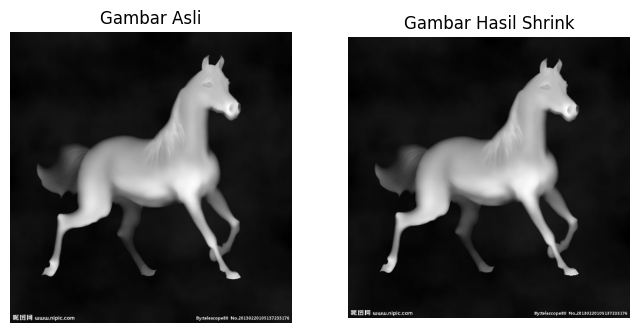

In [14]:
# shrink an image
size = (500, 500)
zoom_image = cv2.resize(image, size, interpolation=cv2.INTER_CUBIC)
plt.figure(figsize=(8,4))
# Subplot for original image
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title("Gambar Asli")
plt.axis('off')

# Subplot for shrinked image
plt.subplot(1, 2, 2)
plt.imshow(zoom_image, cmap='gray')
plt.title("Gambar Hasil Shrink")
plt.axis('off')

plt.show()

Penjelasan tentang perbedaan yang terjadi pada gambar setelah pemrosesan:

1. Downsampling:
   - Mengurangi jumlah piksel dalam gambar.
   - Gambar yang dihasilkan berukuran lebih kecil dan memiliki detail yang lebih sedikit.
   - Data piksel berkurang karena beberapa piksel dihilangkan.

2. Kuantisasi:
   - Mengurangi jumlah level intensitas warna dalam gambar.
   - Beberapa detail dan transisi warna halus mungkin hilang.
   - Data piksel diwakili dengan rentang nilai yang lebih terbatas.

3. Shrinking:
   - Mengurangi ukuran gambar dengan teknik interpolasi.
   - Beberapa detail gambar mungkin hilang atau terdistorsi tergantung pada metode interpolasi yang digunakan.
   - Data piksel diubah untuk menyesuaikan dengan ukuran gambar yang baru.

Penjelasan dengan membandingkan data piksel dari gambar asli dan hasil pemrosesan:

1. Downsampling:
   - Ukuran matriks gambar menjadi lebih kecil.
   - Nilai piksel dapat berubah karena sebagian piksel dihilangkan.

2. Kuantisasi:
   - Ukuran matriks gambar tetap sama.
   - Nilai piksel berubah karena rentang intensitas warna yang lebih terbatas.

3. Shrinking:
   - Ukuran matriks gambar menjadi lebih kecil.
   - Nilai piksel mungkin berbeda karena penggunaan interpolasi untuk menyesuaikan ukuran gambar.
